In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Data
import pickle

# Helpful
import tqdm

# Visualization
import matplotlib.pyplot as plt

# My Methods
from src.utils.CRPS import *
from src.utils.data_split import *
from src.models.EMOS import *
import data.raw.load_data_raw as ldr
import data.processed.load_data_processed as ldp
import data.processed.load_data_processed_denormed as ldpd
from src.models.CRPS_baseline.CRPS_load import *

2023-05-30 15:04:51.518615: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/anaconda3/lib/
2023-05-30 15:04:51.518635: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<IPython.core.display.Javascript object>

### 1. Load data

In [3]:
test_t2m_ws10_denormed = ldpd.load_data_t2m_ws10_test_proc_denorm()

<IPython.core.display.Javascript object>

### 2. Load CRPS Score test

In [4]:
t2m_crps_score_array = crps_load_lead_lat_lon("t2m")

<IPython.core.display.Javascript object>

In [5]:
# If I want to visualize the CRPS for ws10 variable
# t2m_crps_score_array = crps_load_lead_lat_lon('ws10')

<IPython.core.display.Javascript object>

In [6]:
t2m_crps_score_array[0].mean()

0.5084816639136492

<IPython.core.display.Javascript object>

###  3. CRPS scores worse with lead_time?

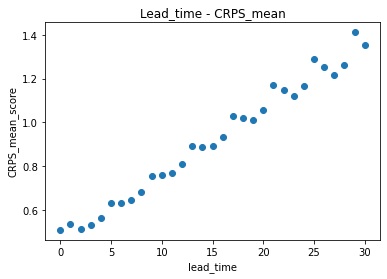

<IPython.core.display.Javascript object>

In [8]:
# Visualization Lead_time - CRPS_mean
t2m_crps_score_lead_time_mean = []
for i in range(len(t2m_crps_score_array)):
    t2m_crps_score_lead_time_mean.append(t2m_crps_score_array[i].mean())

fig, ax = plt.subplots()
ax.scatter(range(31), t2m_crps_score_lead_time_mean)
ax.set_title("Lead_time - CRPS_mean")
ax.set_xlabel("lead_time")
ax.set_ylabel("CRPS_mean_score")
plt.show()

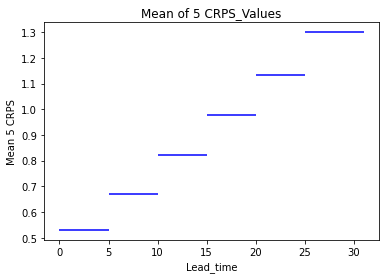

<IPython.core.display.Javascript object>

In [9]:
chunks = [t2m_crps_score_lead_time_mean[i : i + 5] for i in range(0, 25, 5)] + [
    t2m_crps_score_lead_time_mean[-6:]
]
t2m_crps_score_lead_time_mean_5 = [np.mean(chunk) for chunk in chunks]

fig, ax = plt.subplots()

# Plot horizontal lines
for i, mean in enumerate(t2m_crps_score_lead_time_mean_5):
    if i != len(t2m_crps_score_lead_time_mean_5) - 1:
        ax.hlines(mean, i * 5, i * 5 + 5, colors="b")
    else:  # the last line should span 6 points
        ax.hlines(mean, i * 5, i * 5 + 6, colors="b")

# Set the title and labels
ax.set_title("Mean of 5 CRPS_Values")
ax.set_xlabel("Lead_time")
ax.set_ylabel("Mean 5 CRPS")

# Show the plot
plt.show()